<a name='1'></a>
## 1 - Packages ##

In [182]:
# Package imports
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 2 - Load Data and Normalization ##


In [183]:
# Loading the data 
input_data = pd.read_excel("FINAL_data.xlsx")
input_data = input_data.values   # .values converts a pandas dataframe to a numpy array 

In [ ]:
#Categorizing the data into inputs (x) and outputs (y) as well as training set and testing set

from sklearn.model_selection import train_test_split

X = input_data[:1487, 1:7]   # Columns 1 to 6
Y = input_data[:1487, -1:]  # Last column

# test_size=0.2 (20% test), random_state=42
train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42
)

In [185]:
#Normalization process
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = scaler.fit_transform(test_set_x_orig)
train_set_y_normalized = scaler.fit_transform(train_set_y_orig)
test_set_y_normalized = scaler.fit_transform(test_set_y_orig)

#Transpose the data to put all features in the rows and all samples in the columns
train_set_x_normalized = train_set_x_normalized.T     # .T Transpose a numpy array  
test_set_x_normalized = test_set_x_normalized.T
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T


In [186]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 1189
Number of testing examples: m_test = 298
train_set_x shape: (6, 1189)
train_set_y shape: (1, 1189)
test_set_x shape: (6, 298)
test_set_y shape: (1, 298)


<a name='3'></a>
## 3 - Functions ## 

<a name='3-1'></a>
### 3.1 - Sigmoid



In [187]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):    
   
    s = 1 / (1 + np.exp(-z))
    
    return s

<a name='3-2'></a>
### 3.2 - Initialize with zeros

In [188]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):

    w = np.zeros((dim, 1))
    b = 0.0

    return w, b

<a name='3-3'></a>
### 3.3 - Propagate


In [189]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = -(1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
 
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dZ = A - Y
    dw = (1/m) * np.dot(X, dZ.T)
    db = (1/m) * np.sum(dZ)
    
    cost = np.squeeze(np.array(cost))
    #For example, let's say you have a 2D NumPy array with shape (3,1). 
    #If you use np.squeeze on this array, it will remove the second dimension 
    #with size 1 and return a 1D array with shape (3,).
    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

<a name='3-4'></a>
### 3.4 - Optimize


In [190]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=2000, learning_rate=0.009, print_cost=False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    # A deep copy means that the new object is completely independent of the original object, 
    # and any changes made to the new object will not affect the original object.
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
                
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

<a name='3-5'></a>
### 3.5 - Predict


In [191]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = 1 / (1 + np.exp(-(np.dot(w.T, X) + b)))
        
    for i in range(A.shape[1]):
        
        Y_prediction[0,i] = A[0, i]
                
           
    return Y_prediction
    

<a name='6'></a>
## 4 - Model ##

In [192]:
# GRADED FUNCTION: model

def model(train_set_x_normalized, train_set_y_normalized , test_set_x_normalized, test_set_y_normalized, num_iterations=10000, learning_rate=.85, print_cost=False):
 
    # initialize parameters with zeros 
    dim = train_set_x_normalized.shape[0]
    w = np.zeros((dim, 1))
    b = 0

    X = train_set_x_normalized
    Y = train_set_y_normalized
 
    params, grads, costs = optimize(w, b, X, Y, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)

    w=params["w"]
    b=params["b"]

    
    Y_prediction_train = predict(w, b, train_set_x_normalized)
    Y_prediction_test = predict(w, b, test_set_x_normalized)

    # Print train/test Errors
    if print_cost:
        
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y_normalized)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y_normalized)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [193]:
from public_tests import *

model_test(model)

All tests passed!


In [194]:
logistic_regression_model = model(train_set_x_normalized, train_set_y_normalized, test_set_x_normalized, test_set_y_normalized, num_iterations=1000, learning_rate=.85, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.059193
Cost after iteration 200: 0.029293
Cost after iteration 300: 0.019357
Cost after iteration 400: 0.014433
Cost after iteration 500: 0.011500
Cost after iteration 600: 0.009555
Cost after iteration 700: 0.008172
Cost after iteration 800: 0.007138
Cost after iteration 900: 0.006336
train accuracy: 99.43266523315616 %
test accuracy: 99.44746349636866 %


<a name='5'></a>
##  5 - Learning Curve and Reverse Normalization

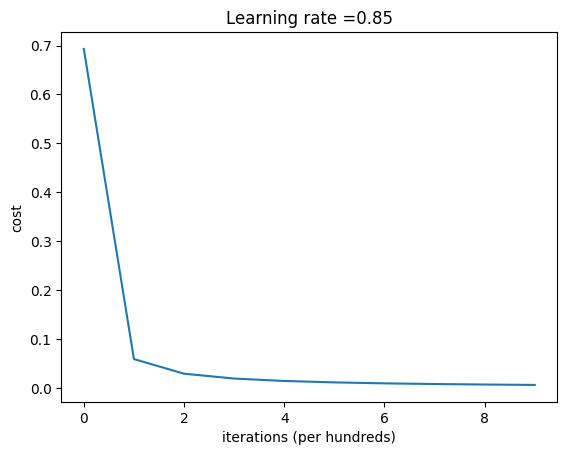

In [195]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [196]:
#Reverse normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reverse the normalization to get the original data
Y_prediction_test_real_scale = scaler.inverse_transform(logistic_regression_model["Y_prediction_test"])



<a name='7'></a>
##  6 - Results Analysis

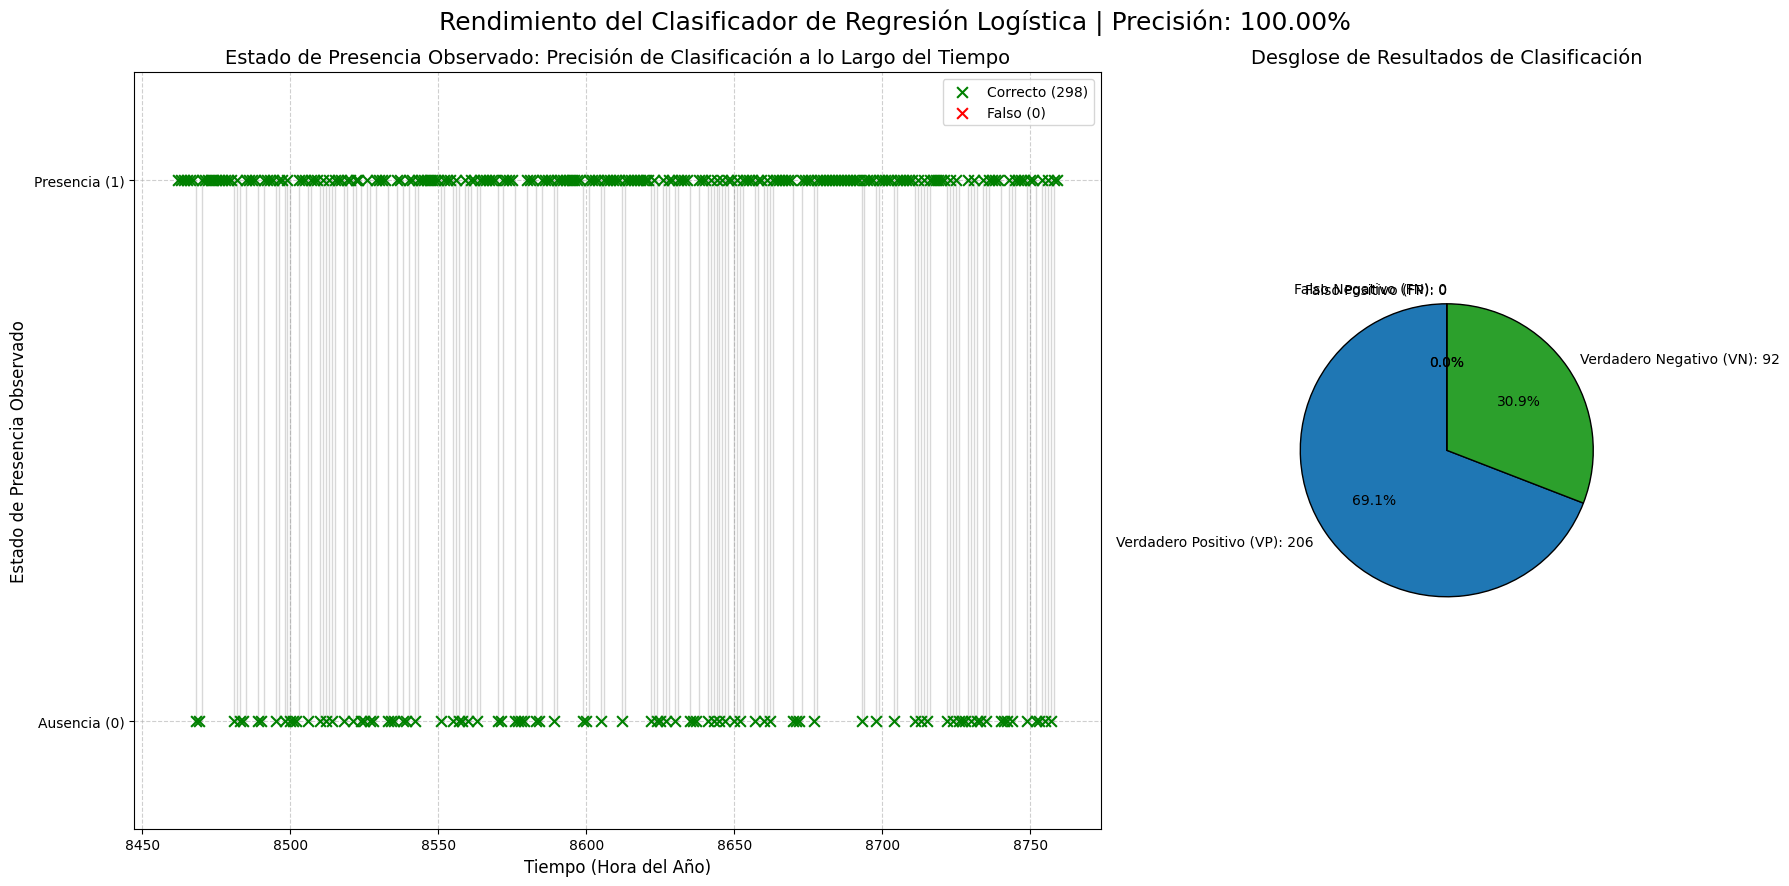

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# --- Assumed Variables from the Notebook ---
# test_set_y_orig: The original un-normalized test labels.
#                  (In your notebook, this is not explicitly defined, 
#                   but we assume it's the un-normalized version of test_set_y_normalized)
# Y_prediction_test_real_scale: The inverse-transformed prediction results 
#                               (calculated in cell 36 of your notebook)

# NOTA IMPORTANTE: Para que este código funcione, debes asegurarte de que 
# 'test_set_y_orig' esté cargado y tenga la misma forma (number of examples) 
# que las predicciones. Usaremos 'test_set_y_normalized' como proxy si 
# 'test_set_y_orig' no está disponible o ha sido correctamente traspuesto (1, m).

# Usaremos la versión normalizada para asegurar la compatibilidad de forma (1, m)
# y luego la aplanaremos para las operaciones binarias.
# Además, ajustaremos las variables para el shape (1, 298) de tu dataset.

# -------------------------------------------------------------
# --- SETUP VARIABLES (Ajustado a tu estructura de datos) ---
# -------------------------------------------------------------

# El shape es (1, m) -> Usamos .flatten() para obtener un array 1D (m,)
# Usamos el Y_test normalizado para las comparaciones.
y_observed = test_set_y_normalized.flatten() 
test_size = y_observed.shape[0] # m_test = 298 o 149 (depende de tu split)

# Creamos el índice de tiempo (asumiendo que los 298/149 ejemplos de prueba
# son el final de un conjunto de 8760 horas, como en el código propuesto)
start_hour = 8760 - test_size  
time_index_hours = np.arange(start_hour, 8760, 1)

# -------------------------------------------------------------
# --- 1. Binarize the Predicted Presence ---
# -------------------------------------------------------------

# Aplanar la predicción float (que viene de la inversa, pero la usaremos 
# como probabilidad para binarizar)
y_pred_float_flat = logistic_regression_model["Y_prediction_test"].flatten() 

# Binarizar la presencia predicha usando un umbral de 0.5
y_pred_binary = (y_pred_float_flat > 0.5).astype(int)

# -------------------------------------------------------------
# --- 2. Calculate and Identify all Outcomes (TP, TN, FP, FN) ---
# -------------------------------------------------------------

# True Positives (TP): Predicted 1, Observed 1
tp_indices = np.where(np.logical_and(y_pred_binary == 1, y_observed == 1))[0]
tp_times = time_index_hours[tp_indices]

# True Negatives (TN): Predicted 0, Observed 0
tn_indices = np.where(np.logical_and(y_pred_binary == 0, y_observed == 0))[0]
tn_times = time_index_hours[tn_indices]

# False Positives (FP): Predicted 1, Observed 0
fp_indices = np.where(np.logical_and(y_pred_binary == 1, y_observed == 0))[0]
fp_times = time_index_hours[fp_indices]

# False Negatives (FN): Predicted 0, Observed 1
fn_indices = np.where(np.logical_and(y_pred_binary == 0, y_observed == 1))[0]
fn_times = time_index_hours[fn_indices]

# Combinar Correcto y Falso para graficar
correct_times = np.concatenate((tp_times, tn_times))
false_times = np.concatenate((fp_times, fn_times))

correct_observed = y_observed[np.concatenate((tp_indices, tn_indices))]
false_observed = y_observed[np.concatenate((fp_indices, fn_indices))]

# Conteos y Precisión para el título
total_errors = len(fp_indices) + len(fn_indices)
total_correct = len(tp_indices) + len(tn_indices)
accuracy = total_correct / test_size * 100

# -------------------------------------------------------------
# --- 3. Create the Figure with Two Subplots ---
# -------------------------------------------------------------

fig = plt.figure(figsize=(18, 9))
# Usar GridSpec para layout: 1 subplots grande a la izquierda, 1 pequeño a la derecha
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1]) 
ax_scatter = fig.add_subplot(gs[0, 0])
ax_pie = fig.add_subplot(gs[0, 1])

# Título General
fig.suptitle(f'Rendimiento del Clasificador de Regresión Logística | Precisión: {accuracy:.2f}%', fontsize=18, y=0.98)


# 3.1. Gráfico de Dispersión: Precisión de Predicción a lo Largo del Tiempo
# Puntos Correctos (Green 'X')
ax_scatter.scatter(correct_times, correct_observed,
                   marker='x', s=60, color='green', linewidth=1.5,
                   label=f'Correcto ({total_correct})', zorder=5)

# Puntos Falsos (Red 'X')
ax_scatter.scatter(false_times, false_observed,
                   marker='x', s=60, color='red', linewidth=1.5,
                   label=f'Falso ({total_errors})', zorder=6) # Zorder asegura que los errores estén encima

# Línea de pasos para mostrar la tendencia general de los datos observados
ax_scatter.step(time_index_hours, y_observed, 
                color='gray', 
                linewidth=1, 
                alpha=0.3,
                where='post')


# Estilo del Gráfico de Dispersión
ax_scatter.set_title('Estado de Presencia Observado: Precisión de Clasificación a lo Largo del Tiempo', fontsize=14)
ax_scatter.set_xlabel('Tiempo (Hora del Año)', fontsize=12)
ax_scatter.set_ylabel('Estado de Presencia Observado', fontsize=12)
ax_scatter.set_yticks([0, 1]) 
ax_scatter.set_yticklabels(['Ausencia (0)', 'Presencia (1)'])
ax_scatter.legend(loc='upper right', fontsize=10)
ax_scatter.grid(True, linestyle='--', alpha=0.6)
ax_scatter.set_ylim(-0.2, 1.2) 


# 3.2. Gráfico Circular: Desglose de la Matriz de Confusión
pie_sizes = [len(tp_indices), len(tn_indices), len(fp_indices), len(fn_indices)]
pie_labels = [
    f'Verdadero Positivo (VP): {len(tp_indices)}',
    f'Verdadero Negativo (VN): {len(tn_indices)}',
    f'Falso Positivo (FP): {len(fp_indices)}',
    f'Falso Negativo (FN): {len(fn_indices)}'
]
pie_colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'] # Azul, Verde, Rojo, Naranja

# Graficar el gráfico circular
ax_pie.pie(pie_sizes, 
            labels=pie_labels, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=pie_colors, 
            wedgeprops={'edgecolor': 'black'})
ax_pie.set_title('Desglose de Resultados de Clasificación', fontsize=14)
ax_pie.axis('equal') # Asegura que el gráfico sea un círculo


plt.tight_layout()
plt.show()